In [1]:
import os
import pandas as pd

In [2]:
runs = r"./MicroRTS-Py/experiments/runs"

In [3]:
def get_score(experiment, score="trueskill"):
    experiment_dir = os.path.join(runs, experiment)
    result = []
    for file in os.listdir(experiment_dir):
        if not file.endswith(".csv"):
            continue
        df = pd.read_csv(os.path.join(experiment_dir, file))
        time = os.path.splitext(file)[0]
        model = "models/" + experiment + "/" + time + ".pt"
        result.append({"time": int(time), "score": df[df["name"] == model][score].values[0]})
    result = pd.DataFrame(result)
    result = result.sort_values("time").reset_index(drop=True)
    return result

def get_score_avg(experiments, score="trueskill"):
    result = []
    for experiment in experiments:
        result.append(get_score(experiment, score))
    result = pd.concat(result)
    result = result.groupby("time").mean().reset_index()
    return result

def draw_score(cat, cat_kg, score="trueskill", ignore=[]):
    score_ = get_score_avg([exp for exp in os.listdir(runs) if exp not in ignore and cat in exp], score)
    score_kg = get_score_avg([exp for exp in os.listdir(runs) if exp not in ignore and cat_kg in exp], score)
    pd.merge(score_, score_kg, on="time", suffixes=("", "_kg")).plot(x="time", y=["score", "score_kg"], title=score)

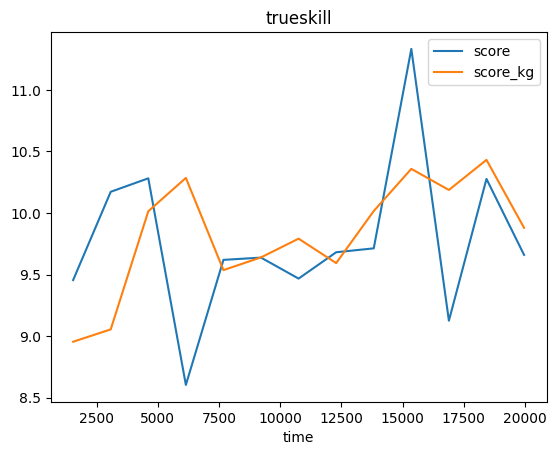

In [4]:
draw_score("____", "__kg1__", ignore=[r"MicroRTSGridModeVecEnv__ppo_gridnet____3__1715037044", r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__1__1714407943"])

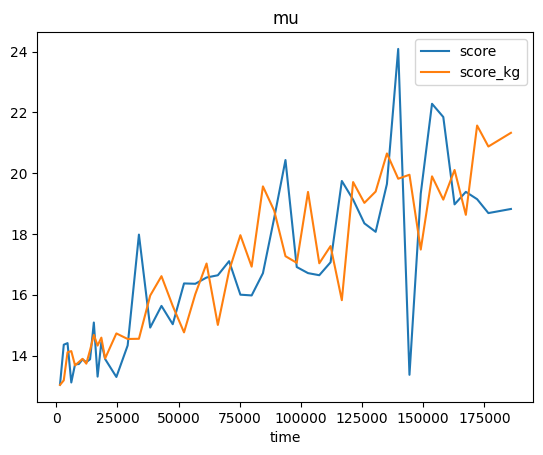

In [5]:
draw_score("____", "__kg1__", "mu")

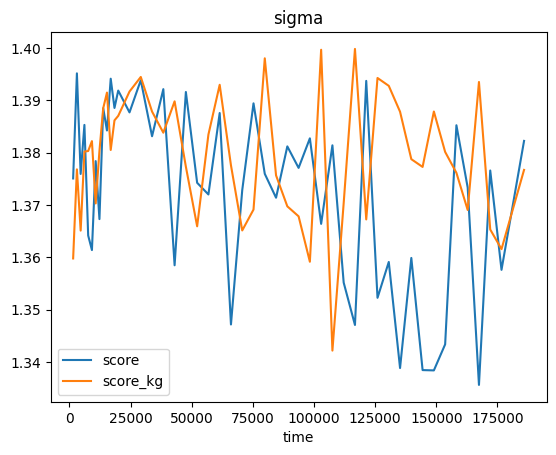

In [6]:
draw_score("____", "__kg1__", "sigma")

<AxesSubplot:title={'center':'KG walk depth comparison'}, xlabel='time'>

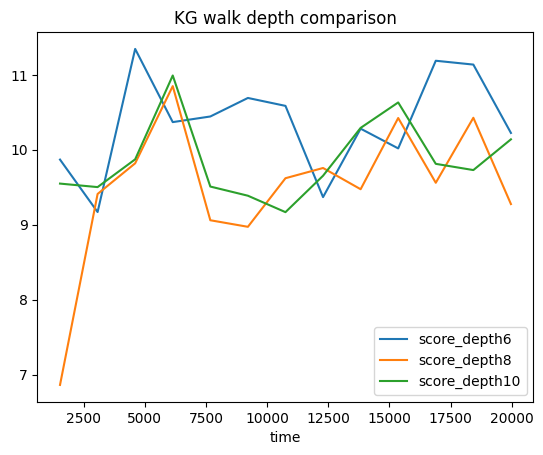

In [7]:
score_kg_depth6 = get_score(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__2__1714500083")
score_kg_depth8 = get_score(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__3__1714509300")
score_kg_depth10 = get_score(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__3__1714504901")
pd.merge(pd.merge(score_kg_depth6, score_kg_depth8, on="time", suffixes=("_depth6", "_depth8")), score_kg_depth10, on="time").rename(columns={"score": "score_depth10"}).plot(x="time", y=["score_depth6", "score_depth8", "score_depth10"], title="KG walk depth comparison")

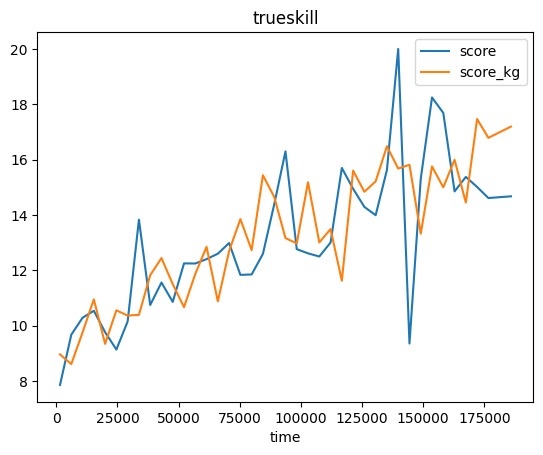

In [8]:
draw_score(r"MicroRTSGridModeVecEnv__ppo_gridnet____3__1715037044", r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__1__1714407943")

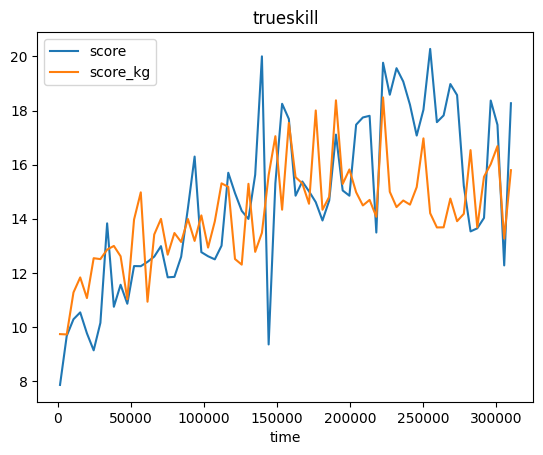

In [4]:
draw_score(r"MicroRTSGridModeVecEnv__ppo_gridnet____3__1715037044", r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg2__4__1716939853")

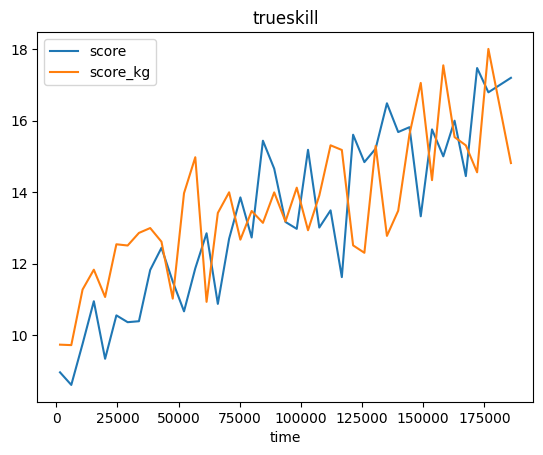

In [6]:
draw_score(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__1__1714407943", r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg2__4__1716939853")

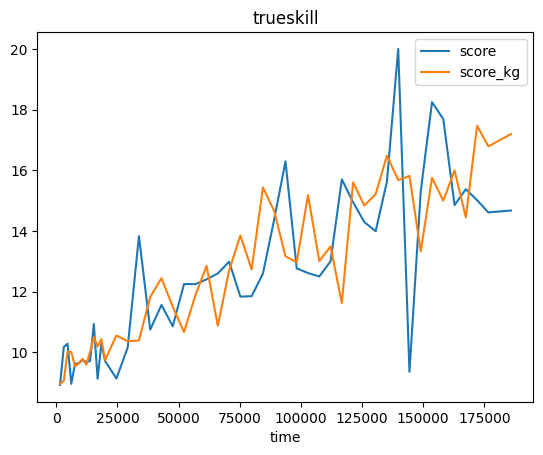

In [5]:
draw_score("____", "__kg1__")